In [121]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score,precision_score,f1_score
import xgboost as xgb

In [2]:
test = pd.read_csv("test.csv", index_col = 0)

In [161]:
test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,ctnum_random,batch_A,batch_B,batch_C,batch_E,batch_F,batch_G,batch_U,ctnum_median_status,infection
418,0.416963,0.181283,0.064580,-0.256586,-0.022616,-0.317925,0.376913,0.086584,-0.255495,0.096489,...,28.43,0,0,0,0,0,0,0,1,1
474,0.199633,0.206295,0.288382,-0.150975,0.394386,0.075909,-0.368996,0.323212,0.079250,0.018757,...,20.44,0,0,0,0,0,0,0,0,0
181,-0.431797,-0.050736,0.030278,-0.117923,0.246983,-0.160531,-0.197276,0.083967,0.028719,-0.148602,...,15.64,0,0,0,0,0,0,0,0,1
446,-0.379012,0.039950,0.292831,0.174339,0.256258,-0.020767,-0.409595,0.085018,0.011241,0.117534,...,24.17,0,0,0,0,0,0,0,1,0
297,0.451459,-0.048828,-0.089349,-0.151467,0.136524,-0.169697,0.116059,-0.235683,-0.048781,0.168612,...,25.53,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,-0.345858,-0.184016,-0.267976,-0.402239,-0.146177,-0.190639,-0.219773,-0.240624,-0.278037,-0.276137,...,21.12,0,0,0,0,0,0,0,0,1
113,-0.437532,-0.172444,-0.003209,-0.007867,-0.018803,-0.055248,-0.353687,0.062032,0.058762,-0.226611,...,16.84,0,0,0,0,0,0,0,0,1
272,0.085456,-0.017223,0.110324,-0.356316,0.245826,-0.166763,0.105081,-0.011678,-0.292295,-0.055272,...,19.11,0,0,0,0,0,0,0,0,1
311,-0.398452,-0.338095,-0.451013,-0.261519,-0.053643,-0.221453,-0.169615,-0.414323,-0.213793,-0.310667,...,26.11,0,0,0,1,0,0,0,1,1


In [3]:
train = pd.read_csv("train.csv", index_col = 0)

In [4]:
validation_data = test.iloc[0:20,:]

In [5]:
train = train.drop(['batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T','batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N'], axis = 1)

In [6]:
test = test.drop(['V19','batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T','batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N'], axis = 1)

In [7]:
val = validation_data.drop(['V19','batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T','batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N'], axis = 1)

In [8]:
train = train.drop(['batch_D'], axis = 1)

In [10]:
test.shape,train.shape,val.shape

((121, 60), (652, 60), (20, 60))

In [14]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F',
       'batch_G', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [15]:
test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F',
       'batch_G', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [16]:
val.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F',
       'batch_G', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [17]:
X_train = train.drop(['infection'], axis = 1)

In [18]:
y_train = train['infection']

In [19]:
X_test = test.drop(['infection'], axis = 1)

In [20]:
y_test = test['infection']

In [22]:
X_val = val.drop(['infection'], axis = 1)

In [23]:
y_val = val['infection']

In [24]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape

((652, 59), (652,), (121, 59), (121,), (20, 59), (20,))

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(X_train)

StandardScaler()

In [28]:
scaled_train_X = scaler.transform(X_train)
scaled_test_X = scaler.transform(X_test)
scaled_val_X = scaler.transform(X_val)

In [29]:
X_train_scaled = pd.DataFrame(scaled_train_X, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaled_test_X, columns=X_test.columns)

In [30]:
np.round(X_train.describe(), 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,agenum_random,ctnum_random,batch_A,batch_B,batch_C,batch_E,batch_F,batch_G,batch_U,ctnum_median_status
count,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,...,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0
mean,-0.1,-0.0,0.0,-0.1,0.0,-0.0,-0.1,0.0,-0.1,-0.0,...,50.9,21.5,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.4
std,0.3,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,18.6,3.1,0.2,0.1,0.1,0.2,0.2,0.1,0.3,0.5
min,-0.6,-0.4,-0.4,-0.5,-0.4,-0.6,-0.6,-0.4,-0.5,-0.5,...,2.0,13.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-0.3,-0.1,-0.1,-0.2,-0.1,-0.2,-0.3,-0.1,-0.2,-0.1,...,36.0,19.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,-0.1,0.0,0.0,-0.0,0.0,-0.0,-0.2,0.0,-0.1,-0.0,...,52.0,21.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.2,0.0,0.1,...,65.0,23.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,0.7,0.4,0.4,0.5,0.5,0.5,0.6,0.5,0.6,0.4,...,89.0,30.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [31]:
np.round(X_train_scaled.describe(), 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,agenum_random,ctnum_random,batch_A,batch_B,batch_C,batch_E,batch_F,batch_G,batch_U,ctnum_median_status
count,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,...,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0
mean,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,...,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.1,-2.7,-2.7,-2.6,-2.2,-2.7,-2.0,-2.5,-2.4,-2.9,...,-2.6,-2.8,-0.2,-0.1,-0.1,-0.2,-0.2,-0.1,-0.3,-0.9
25%,-0.8,-0.6,-0.7,-0.7,-0.8,-0.7,-0.8,-0.8,-0.7,-0.6,...,-0.8,-0.7,-0.2,-0.1,-0.1,-0.2,-0.2,-0.1,-0.3,-0.9
50%,-0.0,0.0,0.1,0.1,-0.0,0.0,-0.2,-0.1,-0.1,0.1,...,0.1,-0.0,-0.2,-0.1,-0.1,-0.2,-0.2,-0.1,-0.3,-0.9
75%,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.6,0.6,...,0.8,0.7,-0.2,-0.1,-0.1,-0.2,-0.2,-0.1,-0.3,1.1
max,2.8,2.8,2.2,3.1,2.6,2.6,2.9,2.3,3.9,2.6,...,2.1,2.9,6.1,7.6,6.8,5.8,6.3,7.6,3.5,1.1


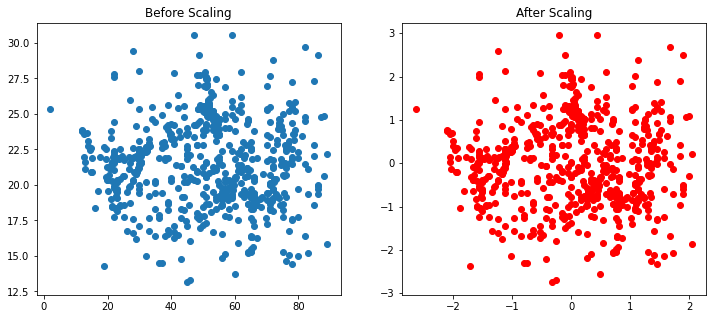

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['agenum_random'], X_train['ctnum_random'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['agenum_random'], X_train_scaled['ctnum_random'],color='red')
ax2.set_title("After Scaling")
plt.show()

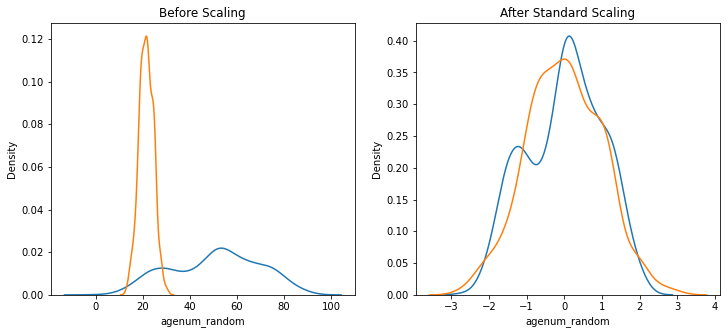

In [35]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['agenum_random'], ax=ax1)
sns.kdeplot(X_train['ctnum_random'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['agenum_random'], ax=ax2)
sns.kdeplot(X_train_scaled['ctnum_random'], ax=ax2)
plt.show()

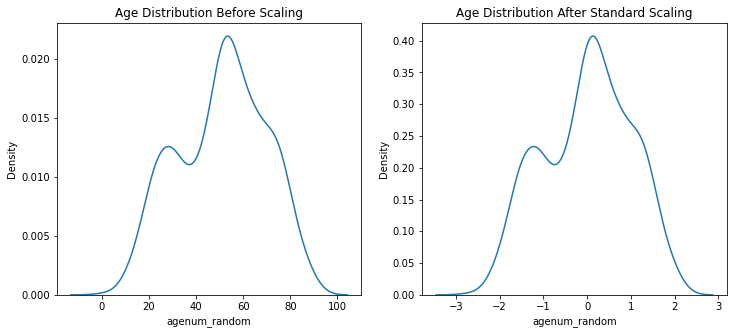

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['agenum_random'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['agenum_random'], ax=ax2)
plt.show()

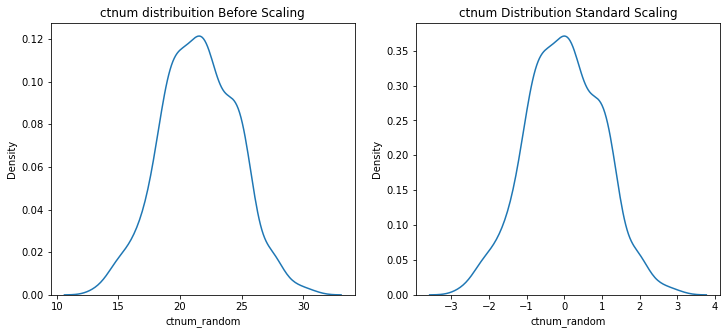

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('ctnum distribuition Before Scaling')
sns.kdeplot(X_train['ctnum_random'], ax=ax1)

# after scaling
ax2.set_title('ctnum Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['ctnum_random'], ax=ax2)
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [40]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

/home/abuzar/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred_lr = lr.predict(X_test)
y_pred_scaled_lr = lr_scaled.predict(X_test_scaled)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:
print("Actual",accuracy_score(y_test,y_pred_lr))
print("Scaled",accuracy_score(y_test,y_pred_scaled_lr))

Actual 0.9834710743801653
Scaled 0.9504132231404959


In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [46]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [47]:
y_pred_dt = dt.predict(X_test)
y_pred_scaled_dt = dt_scaled.predict(X_test_scaled)

In [48]:
print("Actual",accuracy_score(y_test,y_pred_dt))
print("Scaled",accuracy_score(y_test,y_pred_scaled_dt))

Actual 0.8677685950413223
Scaled 0.9008264462809917


In [76]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [94]:
y_pred_nb = nb.predict(X_test)

In [93]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [95]:
y_pred_rf = rf.predict(X_test)

In [97]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [98]:
y_pred_xg = xgb.predict(X_test)

In [100]:
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred_lr))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred_dt))
print("Accuracy of Naive Bayes",accuracy_score(y_test,y_pred_nb))
print("Accuracy of Random Forest",accuracy_score(y_test,y_pred_rf))
print("Accuracy of Xgboost",accuracy_score(y_test,y_pred_xg))

Accuracy of Logistic Regression 0.9834710743801653
Accuracy of Decision Trees 0.8677685950413223
Accuracy of Naive Bayes 0.6942148760330579
Accuracy of Random Forest 0.9586776859504132
Accuracy of Xgboost 0.9752066115702479


In [104]:
print('Confusion matric of Logistic Regression', confusion_matrix(y_test,y_pred_lr))
print('Confusion matric of Random Forest', confusion_matrix(y_test,y_pred_rf))
print('Confusion matric of Naive bayes', confusion_matrix(y_test,y_pred_nb))
print('Confusion matric of Decision tree', confusion_matrix(y_test,y_pred_dt))
print('Confusion matric of XgBoost', confusion_matrix(y_test,y_pred_xg))

Confusion matric of Logistic Regression [[ 17   0]
 [  2 102]]
Confusion matric of Random Forest [[ 14   3]
 [  2 102]]
Confusion matric of Naive bayes [[17  0]
 [37 67]]
Confusion matric of Decision tree [[ 7 10]
 [ 6 98]]
Confusion matric of XgBoost [[ 17   0]
 [  3 101]]


In [51]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred_lr),columns=list(range(0,2)))

Logistic Regression Confusion Matrix



,0,1
0,17,0
1,2,102


In [81]:
print("Naive Bayes Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred_nb),columns=list(range(0,2)))

Naive Bayes Confusion Matrix



,0,1
0,17,0
1,37,67


In [105]:
print("XgBoost Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred_xg),columns=list(range(0,2)))

XgBoost Confusion Matrix



,0,1
0,17,0
1,3,101


In [54]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred_dt),columns=list(range(0,2)))

Decision Tree Confusion Matrix



,0,1
0,7,10
1,6,98


In [106]:
print("random Forest Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred_rf),columns=list(range(0,2)))

random Forest Confusion Matrix



,0,1
0,14,3
1,2,102


In [107]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred_lr
result['Decision Tree Prediction'] = y_pred_dt
result['Naive bayes Prediction'] = y_pred_nb
result['Random forest Prediction'] = y_pred_rf
result['XgBoost Prediction'] = y_pred_xg

In [108]:
result.sample(10)

,Actual Label,Logistic Regression Prediction,Decision Tree Prediction,Naive bayes Prediction,Random forest Prediction,XgBoost Prediction
271,1,1,0,0,1,1
126,1,1,1,0,1,1
30,1,1,1,0,1,1
113,1,1,1,0,1,1
380,1,1,1,1,1,1
185,1,1,1,1,1,1
393,1,1,1,0,1,1
154,1,1,1,1,1,1
360,1,1,1,1,1,1
75,1,1,1,1,1,1


In [87]:
print("For Logistic regression Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred_lr),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred_lr))
print("Recall - ",recall_score(y_test,y_pred_lr))
print("F1 score - ",f1_score(y_test,y_pred_lr))

For Logistic regression Model
--------------------------------------------------
    0    1
0  17    0
1   2  102
--------------------------------------------------
Precision -  1.0
Recall -  0.9807692307692307
F1 score -  0.9902912621359222


In [88]:
print("For DT Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred_dt),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred_dt))
print("Recall - ",recall_score(y_test,y_pred_dt))
print("F1 score - ",f1_score(y_test,y_pred_dt))

For DT Model
--------------------------------------------------
   0   1
0  7  10
1  6  98
--------------------------------------------------
Precision -  0.9074074074074074
Recall -  0.9423076923076923
F1 score -  0.9245283018867925


In [89]:
print("For Naive bayes Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred_nb),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred_nb))
print("Recall - ",recall_score(y_test,y_pred_nb))
print("F1 score - ",f1_score(y_test,y_pred_nb))

For Naive bayes Model
--------------------------------------------------
    0   1
0  17   0
1  37  67
--------------------------------------------------
Precision -  1.0
Recall -  0.6442307692307693
F1 score -  0.7836257309941521


In [109]:
print("For Random forest Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred_rf),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred_rf))
print("Recall - ",recall_score(y_test,y_pred_rf))
print("F1 score - ",f1_score(y_test,y_pred_rf))

For Random forest Model
--------------------------------------------------
    0    1
0  14    3
1   2  102
--------------------------------------------------
Precision -  0.9714285714285714
Recall -  0.9807692307692307
F1 score -  0.9760765550239234


In [110]:
print("For XgBoost Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred_xg),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred_xg))
print("Recall - ",recall_score(y_test,y_pred_xg))
print("F1 score - ",f1_score(y_test,y_pred_xg))

For XgBoost Model
--------------------------------------------------
    0    1
0  17    0
1   3  101
--------------------------------------------------
Precision -  1.0
Recall -  0.9711538461538461
F1 score -  0.9853658536585366


In [116]:
print('Precision score of Logistic regression' ,precision_score(y_test,y_pred_lr,average=None))
print('Precision score of Naive Bayes' ,precision_score(y_test,y_pred_nb,average=None))
print('Precision score of Random Forest' ,precision_score(y_test,y_pred_rf,average=None))
print('Precision score of Decision Tree' ,precision_score(y_test,y_pred_dt,average=None))
print('Precision score of XgBoost' ,precision_score(y_test,y_pred_xg,average=None))

Precision score of Logistic regression [0.89473684 1.        ]
Precision score of Naive Bayes [0.31481481 1.        ]
Precision score of Random Forest [0.875      0.97142857]
Precision score of Decision Tree [0.53846154 0.90740741]
Precision score of XgBoost [0.85 1.  ]


In [118]:
print('Recall of Logistic Regression',recall_score(y_test,y_pred_lr,average=None))
print('Recall of Naive Bayes',recall_score(y_test,y_pred_nb,average=None))
print('Recall of Random Forest',recall_score(y_test,y_pred_rf,average=None))
print('Recall of Decision Tree',recall_score(y_test,y_pred_dt,average=None))
print('Recall of XgBoost',recall_score(y_test,y_pred_xg,average=None))

Recall of Logistic Regression [1.         0.98076923]
Recall of Naive Bayes [1.         0.64423077]
Recall of Random Forest [0.82352941 0.98076923]
Recall of Decision Tree [0.41176471 0.94230769]
Recall of XgBoost [1.         0.97115385]


In [154]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
#xg_probs = xgb.predict_proba(X_test)
lr_probs = lr.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

In [155]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
dt_probs = dt_probs[:, 1]
lr_probs = lr_probs[:, 1]
#xg_probs = xg_probs[:, 1]

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score

In [157]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
xg_auc = roc_auc_score(y_test, xg_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [158]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('XgBoost: AUROC = %.3f' % (xg_auc))
print('Logistic regression: AUROC = %.3f' % (lr_auc))
print('Decision tree: AUROC = %.3f' % (dt_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.989
Naive Bayes: AUROC = 0.967
XgBoost: AUROC = 0.997
Logistic regression: AUROC = 0.997
Decision tree: AUROC = 0.677


In [159]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
xg_fpr, xg_tpr, _ = roc_curve(y_test, xg_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

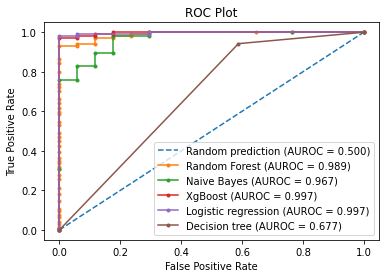

In [160]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(xg_fpr, xg_tpr, marker='.', label='XgBoost (AUROC = %0.3f)' % xg_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic regression (AUROC = %0.3f)' % lr_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision tree (AUROC = %0.3f)' % dt_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()